In [7]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D
from density import grid

Populating the interactive namespace from numpy and matplotlib


In [27]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [5]:
#Function that reads the N-body sumulation orbit
def Nbody_orbit(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    time = data[:,0]
    Rgal = data[:,1]
    x_sat= data[:,2]
    y_sat = data[:,3]
    z_sat = data[:,4]
    x_gal = data[:,5]
    y_gal = data[:,6]
    z_gal = data[:,7]
    Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,12]
    vy_gal = data[:,13]
    vz_gal = data[:,14]
    return time, Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal


In [43]:
tNB, RgalNB, xsatNB, ysatNB, zsatNB, xgalNB, ygalNB, zgalNB, vgalNB, vxsatNB, vysatNB, vzsatNB, vxgalNB, vygalNB, vzgalNB\
= Nbody_orbit('LMC6_H1.txt')

In [130]:
def Nbody_snaps(snap, Nhost):
    path = '../../data/LMCMW/MWmLMC6/H1/'
    positions = readsnap(path + snap,'pos', 'dm')
    particles_ids = readsnap(path + snap, 'pid', 'dm')
    ID = np.sort(particles_ids)
    # The first set of particles are from the host DM halo, the
    # second set are from the satellite DM halo, the limit is know by
    # the number of particles in the host halo.
    idcut = ID[Nhost-1]
    index_mw = np.where(particles_ids<=idcut)[0]
    index_LMC = np.where(particles_ids>idcut)[0]
    x_mw = positions[index_mw,0]
    y_mw = positions[index_mw,1]
    z_mw = positions[index_mw,2]
    x_lmc = positions[index_LMC,0]
    y_lmc = positions[index_LMC,1]
    z_lmc = positions[index_LMC,2]
    # cuts 
    index1 = np.where(np.sqrt(x_mw**2+y_mw**2+z_mw**2)<500)[0]
    index2 = np.where(np.sqrt(x_lmc**2+y_lmc**2+z_lmc**2)<500)[0]
    index3 = np.where(np.sqrt(positions[:, 0]**2.0+positions[:, 1]**2.0+positions[:, 2]**2.0)<400)[0]
    #return positions[index3, 0], positions[index3, 1], positions[index3, 2]
    return x_mw[index1], y_mw[index1], z_mw[index1], x_lmc[index2], y_lmc[index2], z_lmc[index2]




In [131]:
xMW, yMW, zMW, xLMC, yLMC, zLMC = Nbody_snaps('MWfLMC6H1_119.hdf5', 1000000)
#X, Y, Z = Nbody_snaps('MWfLMC6H1_119.hdf5', 1000000)

Returning DM    Positions
Returning DM    Particle IDs


855307
456979


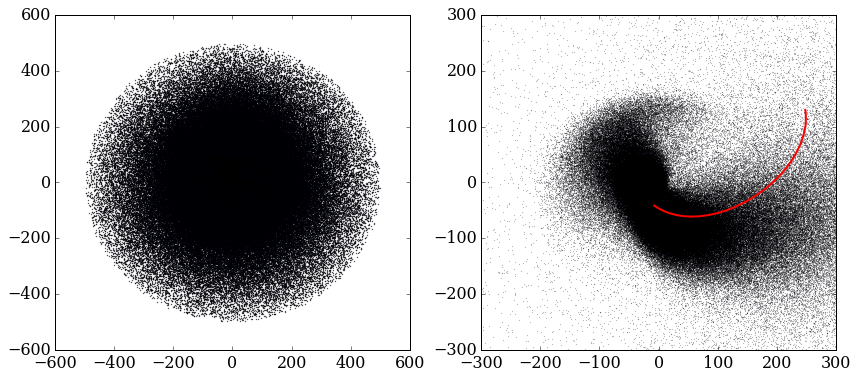

In [159]:
figure(figsize=(14, 6))
subplot(1, 2, 1)
scatter(xMW, yMW, s=0.1)
subplot(1, 2, 2)
scatter(yLMC, zLMC, s=0.01)
plot(ysatNB[:119], zsatNB[:119], lw=2, c='r')
xlim(-300, 300)
ylim(-300, 300)
#axis('equal')

print len(xMW)
print len(yLMC)



In [286]:
slice_x = where(abs(X)<50)[0]


932787


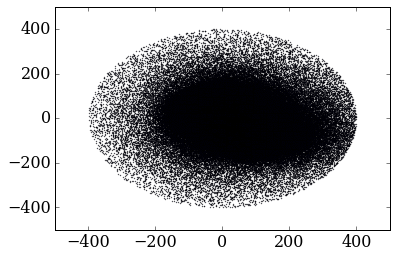

In [278]:
scatter(Y[slice_x], Z[slice_x], s=0.1)
#scatter(X[slice_x], Y[slice_x], s=0.1)
print len(Y[slice_x])

In [287]:
zMW_proy = np.zeros(len(xMW))
rho_mw = grid(Y[slice_x], Z[slice_x], X[slice_x], 1000)

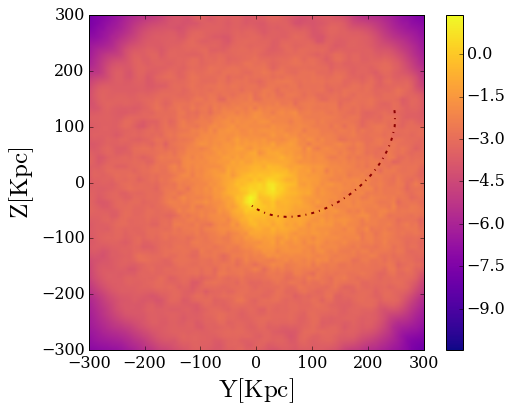

In [285]:
figure(figsize=(8,6))
imshow(log10(rho_mw.T), origin='lower', extent=[min(Y[slice_x]), max(Y[slice_x]), 
                                                 min(Z[slice_x]), max(Z[slice_x])], cmap='plasma')
colorbar()
xlim(-300, 300)
ylim(-300, 300)
plot(ysatNB[:120], zsatNB[:120], lw=2, c='darkred', alpha=1, ls='-.')
xlabel('$\mathrm{Y[Kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[Kpc]}$', fontsize=25)

In [82]:
print len(ysatNB)

151


In [86]:
ysatNB[119]-ygalNB[119]

-44.966175999999997

In [137]:
#rho_lmc = grid(yLMC, zLMC, xLMC, 500)

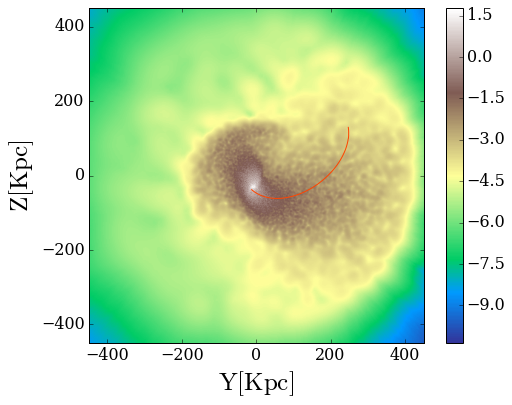

In [219]:
figure(figsize=(8,6))
imshow(log10(rho_lmc.T), origin='lower',extent=[min(yLMC), max(yLMC), 
                                                min(zLMC), max(zLMC)],cmap='terrain')
colorbar()
xlim(-450, 450)
ylim(-450, 450)
plot(ysatNB[:120], zsatNB[:120], lw=1, c='orangered', alpha=1.0, ls='-')
xlabel('$\mathrm{Y[Kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[Kpc]}$', fontsize=25)
savefig('LMC6_denisty.png', dpi=600, bbox_inches='tight')


In [259]:
rho_lmcXZ = grid(xLMC, zLMC, yLMC, 100)

In [266]:
index_sn = np.where((xLMC<-7) & (xLMC>-10) & (abs(zLMC)<10) &(abs(yLMC)<10))
rho_lmc_sn = grid(xLMC[index_sn], zLMC[index_sn], yLMC[index_sn], 200)

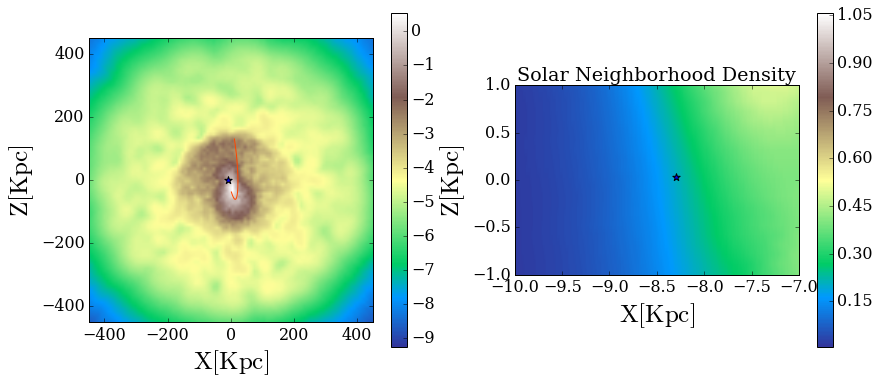

In [280]:
figure(figsize=(14,6))
subplot(1, 2, 1)
imshow(log10(rho_lmcXZ.T), origin='lower',extent=[min(xLMC), max(xLMC), 
                                                min(zLMC), max(zLMC)],cmap='terrain')
colorbar()
plot(xsatNB[:120], zsatNB[:120], lw=1, c='orangered', alpha=1.0, ls='-')
scatter(-8.3, 0.027, s=60, marker='*')
xlim(-450, 450)
ylim(-450, 450)
xlabel('$\mathrm{X[Kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[Kpc]}$', fontsize=25)

subplot(1, 2, 2)
title('Solar Neighborhood Density')
imshow((rho_lmc_sn.T), origin='lower',extent=[min(xLMC[index_sn]), max(xLMC[index_sn]), 
                                                min(zLMC[index_sn]), max(zLMC[index_sn])],cmap='terrain')
colorbar()
#plot(xsatNB[:120], zsatNB[:120], lw=1, c='orangered', alpha=1.0, ls='-')
scatter(-8.3, 0.027, s=60, marker='*')
xlim(-10, -7)
ylim(-1, 1)
xlabel('$\mathrm{X[Kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[Kpc]}$', fontsize=25)